In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [4]:
outliers={}

for col in df.select_dtypes(include='number').columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1


  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR

  outliers[col]=df[(df[col]<lower) | (df[col]>upper)].index.tolist()
  print(f"{col}: {len(outliers[col])}")

Price: 110
Age_08_04: 7
KM: 49
HP: 11
Automatic: 80
cc: 123
Doors: 0
Cylinders: 0
Gears: 46
Weight: 66


In [5]:
import numpy as np

df_capped = df.copy()

for col in df_capped.select_dtypes(include=['float64','int64']).columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values
    df_capped[col] = np.where(df_capped[col] < lower, lower,
                        np.where(df_capped[col] > upper, upper, df_capped[col]))


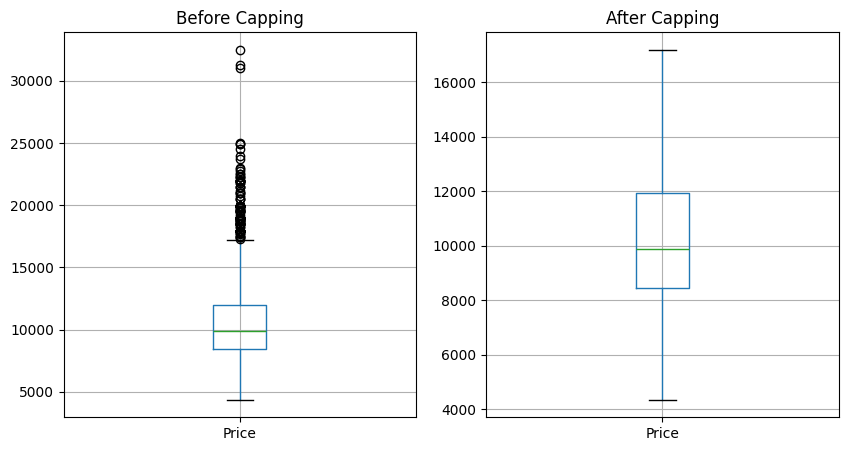

In [6]:
import matplotlib.pyplot as plt

col = "Price"  # change to any column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.boxplot(column=col)
plt.title("Before Capping")

plt.subplot(1,2,2)
df_capped.boxplot(column=col)
plt.title("After Capping")

plt.show()

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
# One-hot encode the 'Fuel_Type' column
df_processed = pd.get_dummies(df_capped, columns=['Fuel_Type'], drop_first=True)

# Display the first few rows of the processed DataFrame
display(df_processed.head())

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,True,False


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop('Price', axis=1)
y = df_processed['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1148, 11)
Testing set shape: (288, 11)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [11]:
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",np.round(MSE,2))

Mean Squared Error: 1179909.6


In [12]:
R2=r2_score(y_test,y_pred)
print("R2 Score:",R2)

R2 Score: 0.8626684189497994


In [13]:
rmse=root_mean_squared_error(y_test,y_pred)
print("Root Mean Squared Error:",np.round(rmse,2))

Root Mean Squared Error: 1086.24


In [14]:
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics

In [15]:
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [16]:
# Calculate Mean Squared Error
MSE_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {np.round(MSE_lasso, 2)}")

# Calculate R2 Score
R2_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(f"Lasso R2 Score: {R2_lasso}")

# Calculate Root Mean Squared Error
rmse_lasso = metrics.root_mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Root Mean Squared Error: {np.round(rmse_lasso, 2)}")

Lasso Mean Squared Error: 1179446.83
Lasso R2 Score: 0.8627222821609347
Lasso Root Mean Squared Error: 1086.02


In [17]:
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [18]:
# Calculate Mean Squared Error for Ridge
MSE_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Mean Squared Error: {np.round(MSE_ridge, 2)}")

# Calculate R2 Score for Ridge
R2_ridge = metrics.r2_score(y_test, y_pred_ridge)
print(f"Ridge R2 Score: {R2_ridge}")

# Calculate Root Mean Squared Error for Ridge
rmse_ridge = metrics.root_mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Root Mean Squared Error: {np.round(rmse_ridge, 2)}")

Ridge Mean Squared Error: 1179384.52
Ridge R2 Score: 0.8627295342138468
Ridge Root Mean Squared Error: 1085.99


In [20]:

coefficients = model.coef_

feature_names = X_train.columns


coef_dict = dict(zip(feature_names, coefficients))


print("Model Coefficients:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")

Model Coefficients:
Age_08_04: -106.4202
KM: -0.0143
HP: 27.3389
Automatic: 0.0000
cc: -2.5014
Doors: -97.6904
Cylinders: 0.0000
Gears: 0.0000
Weight: 24.9917
Fuel_Type_Diesel: 1169.5047
Fuel_Type_Petrol: 1283.3690


In [ ]:
#1.What is Normalization & Standardization and how is it helpful?
#Definition:
#Normalization is the process of scaling numerical data to a specific range, typically [0, 1] or sometimes [-1, 1].


In [ ]:
#Definition:
#Standardization (also called Z-score normalization) rescales the data to have a mean of 0 and a standard deviation of 1.

In [ ]:
#1.Puts all features on the same scale
#2. Speeds up model training
#3.More reliable calculations.
#4.Improves interpretability and makes data easier to analyze.